# SkillFactory
## Введение в ML, введение в sklearn

В этом задании мы с вами рассмотрим данные с конкурса [Задача предсказания отклика клиентов ОТП Банка](http://www.machinelearning.ru/wiki/index.php?title=%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BE%D1%82%D0%BA%D0%BB%D0%B8%D0%BA%D0%B0_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_%D0%9E%D0%A2%D0%9F_%D0%91%D0%B0%D0%BD%D0%BA%D0%B0_%28%D0%BA%D0%BE%D0%BD%D0%BA%D1%83%D1%80%D1%81%29)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

### Грузим данные

Считаем описание данных

In [2]:

df_descr = pd.read_csv('data/otp_description.csv', sep='\t', encoding='utf8')

In [3]:
df_descr

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,AGE,возраст клиента
2,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
3,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...
4,GENDER,"пол клиента (1- женщины, 0-мужчины)"
5,CHILD_TOTAL,количество детей клиента
6,DEPENDANTS,количество иждивенцев клиента
7,EDUCATION,образование
8,MARITAL_STATUS,семейное положение
9,GEN_INDUSTRY,отрасль работы клиента


Считаем обучающую выборки и тестовую (которую мы как бы не видим)

In [4]:
df_train = pd.read_csv('data/otp_train.csv', sep='\t', encoding='utf8')

In [5]:
df_train.shape

(15223, 52)

In [6]:
df_test = pd.read_csv('data/otp_test.csv', sep='\t', encoding='utf8')

In [7]:
df_test.shape

(14910, 52)

In [8]:
df_train.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,59910150,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,...,0,1,1,1,6,2,1,1580,1580,NaN
1,59910230,0,32,1,0,1,3,3,Среднее,Состою в браке,...,0,1,1,1,6,1,1,4020,4020,NaN
2,59910525,0,52,1,0,1,4,0,Неполное среднее,Состою в браке,...,0,1,2,1,11,0,0,0,0,NaN
3,59910803,0,39,1,0,1,1,1,Высшее,Состою в браке,...,1,1,1,1,6,3,1,"1589,92333333333",1590,NaN
4,59911781,0,30,1,0,0,0,0,Среднее,Состою в браке,...,0,1,2,1,16,2,1,"1152,15",2230,NaN


## Объединим две выборки

Так как пока мы пока не умеем работать sklearn  Pipeline, то для того, чтобы после предобработки столбцы в двух выборках находились на своих местах.

Для того, чтобы в дальнейшем отделить их введем новый столбец "sample"

In [9]:
df_train.loc[:, 'sample'] = 'train'
df_test.loc[:, 'sample'] = 'test'

In [13]:
df = df_test.append(df_train).reset_index(drop=True)

In [14]:
df.shape

(30133, 53)

### Чуть-чуть посмотрим на данные

Посмотрим типы данных и их заполняемость

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PRO

Видим, что часть данных - object, скорее всего стоки.


Давайте выведем эти значения для каждого столбца

In [16]:
for i in df_train.columns: # перебираем все столбцы
    if str(df_train[i].dtype) == 'object': # если тип столбца - object
        print('='*10)
        print(i) # выводим название столбца
        print(set(df_train[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n') # выводим пустую строку

EDUCATION
{'Среднее', 'Неполное среднее', 'Два и более высших образования', 'Среднее специальное', 'Высшее', 'Неоконченное высшее', 'Ученая степень'}


MARITAL_STATUS
{'Разведен(а)', 'Вдовец/Вдова', 'Не состоял в браке', 'Гражданский брак', 'Состою в браке'}


GEN_INDUSTRY
{nan, 'Транспорт', 'Наука', 'Металлургия/Промышленность/Машиностроение', 'Торговля', 'Управляющая компания', 'Подбор персонала', 'Сборочные производства', 'Строительство', 'СМИ/Реклама/PR-агенства', 'Ресторанный бизнес/Общественное питание', 'Страхование', 'Юридические услуги/нотариальные услуги', 'Другие сферы', 'Нефтегазовая промышленность', 'Здравоохранение', 'Химия/Парфюмерия/Фармацевтика', 'ЧОП/Детективная д-ть', 'Энергетика', 'Туризм', 'Образование', 'Салоны красоты и здоровья', 'Маркетинг', 'Коммунальное хоз-во/Дорожные службы', 'Недвижимость', 'Логистика', 'Информационные технологии', 'Сельское хозяйство', 'Развлечения/Искусство', 'Государственная служба', 'Банк/Финансы', 'Информационные услуги'}


GEN_TITLE


Mожно заметить что некоторые переменные, которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа, но по какой-то причине были распознаны как строки

Причина же что использовалась запятая для разделения не целой части числа..

Перекодировать их можно например так:

In [17]:
df['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')

0         7000.0
1         4100.0
2        40000.0
3        20000.0
4        17000.0
5         7000.0
6        10000.0
7         7500.0
8         9000.0
9         4000.0
10       15000.0
11       12000.0
12        8000.0
13       20000.0
14       18500.0
15       14000.0
16        6000.0
17        9000.0
18        5000.0
19       15000.0
20        6100.0
21       22180.0
22        9000.0
23        8700.0
24        7000.0
25        6000.0
26       15000.0
27       12000.0
28       11000.0
29        8000.0
          ...   
30103    12000.0
30104    10000.0
30105    10000.0
30106     8000.0
30107    11000.0
30108     7000.0
30109    10000.0
30110     8000.0
30111    25000.0
30112    10000.0
30113    12000.0
30114     7000.0
30115    12000.0
30116    14500.0
30117    12000.0
30118     8000.0
30119     7000.0
30120    10000.0
30121    10000.0
30122    10000.0
30123    15000.0
30124     8100.0
30125     9500.0
30126    13000.0
30127    10000.0
30128    12000.0
30129    10000.0
30130     6000

Такой эффект наблюдается в столбцах `PERSONAL_INCOME`, `CREDIT`, `FST_PAYMENT`, `LOAN_AVG_DLQ_AMT`, `LOAN_MAX_DLQ_AMT`

In [18]:
df['PERSONAL_INCOME']

0         7000
1         4100
2        40000
3        20000
4        17000
5         7000
6        10000
7         7500
8         9000
9         4000
10       15000
11       12000
12        8000
13       20000
14       18500
15       14000
16        6000
17        9000
18        5000
19       15000
20        6100
21       22180
22        9000
23        8700
24        7000
25        6000
26       15000
27       12000
28       11000
29        8000
         ...  
30103    12000
30104    10000
30105    10000
30106     8000
30107    11000
30108     7000
30109    10000
30110     8000
30111    25000
30112    10000
30113    12000
30114     7000
30115    12000
30116    14500
30117    12000
30118     8000
30119     7000
30120    10000
30121    10000
30122    10000
30123    15000
30124     8100
30125     9500
30126    13000
30127    10000
30128    12000
30129    10000
30130     6000
30131     4500
30132    20000
Name: PERSONAL_INCOME, Length: 30133, dtype: object

### Теперь ваше небольшое исследование

#### Задание 1. Есть ли пропуски в данных? Что с ними сделать?

(единственного верного ответа нет - аргументируйте)

In [19]:
#Всего записей 30133 
#Пропуски наблюдаются в колонках
#GEN_INDUSTRY                  27420 non-null object
#GEN_TITLE                     27420 non-null object
#ORG_TP_STATE                  27420 non-null object
#ORG_TP_FCAPITAL               27425 non-null object
#JOB_DIR                       27420 non-null object
#TP_PROVINCE                   29543 non-null object
#WORK_TIME                     27416 non-null float64
#PREVIOUS_CARD_NUM_UTILIZED    600 non-null float64

#Пустые значения можно заменить, например, Work_Time на 0.0, строковые значения на "undefined", или на ""
#Нулевые значения в PREVIOUS_CARD_NUM_UTILIZED приводить к числовому значению, по-моему, не стоит.

#### Задание 2. Есть ли категориальные признаки? Что с ними делать?

In [20]:
#Да, такие признаки есть. Их нужно закодировать числами, если хотим классифицировать данные по этим признакам.

#### Задание 3. Фунция предобработки

Напишите функцию, которая бы

* Удаляло идентификатор `AGREEMENT_RK`
* Избавлялась от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
* Что-то делала с пропусками
* Кодировала категориальные признаки

В результате, ваш датафрейм должен содержать только числа и не содержать пропусков!

In [116]:
from sklearn.preprocessing import LabelEncoder
def preproc_data(df_input):
    df_output = df_input.copy()
    df_output.head()
    ## Your Code Here

    # удалим колонку
    df_output = df_output.drop(['AGREEMENT_RK'], axis=1)
    
    # заменим запятую на точку и изменим тип колонке
    df_output['PERSONAL_INCOME'] = df_output['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['CREDIT'] = df_output['CREDIT'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['FST_PAYMENT'] = df_output['FST_PAYMENT'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['LOAN_AVG_DLQ_AMT'] = df_output['LOAN_AVG_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['LOAN_MAX_DLQ_AMT'] = df_output['LOAN_MAX_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')
    
    df_output['GEN_INDUSTRY'] = df_output['GEN_INDUSTRY'].fillna('undefined')
    df_output['GEN_TITLE'] = df_output['GEN_TITLE'].fillna('undefined')
    df_output['ORG_TP_STATE'] = df_output['ORG_TP_STATE'].fillna('undefined')
    df_output['ORG_TP_FCAPITAL'] = df_output['ORG_TP_FCAPITAL'].fillna('undefined')
    df_output['JOB_DIR'] = df_output['JOB_DIR'].fillna('undefined')
    df_output['TP_PROVINCE'] = df_output['TP_PROVINCE'].fillna('undefined')
    df_output['REGION_NM'] = df_output['REGION_NM'].fillna('undefined')
    
    df_output['WORK_TIME'] = df_output['WORK_TIME'].fillna(0)
    df_output['PREVIOUS_CARD_NUM_UTILIZED'] = df_output['PREVIOUS_CARD_NUM_UTILIZED'].fillna(0)
    
    # закодируем категории
    le = LabelEncoder()
    le.fit(df_output.EDUCATION)
#    df_output['EDUCATION_LE'] = le.transform(df_output.EDUCATION)
    df_output['EDUCATION'] = le.transform(df_output.EDUCATION)
    
    le.fit(df_output.MARITAL_STATUS)
#    df_output['MARITAL_STATUS_LE'] = le.transform(df_output.MARITAL_STATUS)
    df_output['MARITAL_STATUS'] = le.transform(df_output.MARITAL_STATUS)

    le.fit(df_output.GEN_TITLE)
#    df_output['GEN_TITLE_LE'] = le.transform(df_output.GEN_TITLE)
    df_output['GEN_TITLE'] = le.transform(df_output.GEN_TITLE)
    
    le.fit(df_output.ORG_TP_STATE)
#    df_output['ORG_TP_STATE_LE'] = le.transform(df_output.ORG_TP_STATE)
    df_output['ORG_TP_STATE'] = le.transform(df_output.ORG_TP_STATE)
    
    le.fit(df_output.ORG_TP_FCAPITAL)
#    df_output['ORG_TP_FCAPITAL_LE'] = le.transform(df_output.ORG_TP_FCAPITAL)
    df_output['ORG_TP_FCAPITAL'] = le.transform(df_output.ORG_TP_FCAPITAL)
    
    le.fit(df_output.JOB_DIR)
#    df_output['JOB_DIR_LE'] = le.transform(df_output.JOB_DIR)
    df_output['JOB_DIR'] = le.transform(df_output.JOB_DIR)
    
    le.fit(df_output.FAMILY_INCOME)
#    df_output['FAMILY_INCOME_LE'] = le.transform(df_output.FAMILY_INCOME)
    df_output['FAMILY_INCOME'] = le.transform(df_output.FAMILY_INCOME)

    le.fit(df_output.GEN_INDUSTRY)
#    df_output['GEN_INDUSTRY_LE'] = le.transform(df_output.GEN_INDUSTRY)
    df_output['GEN_INDUSTRY'] = le.transform(df_output.GEN_INDUSTRY)
    
    le.fit(df_output.REG_ADDRESS_PROVINCE)
#    df_output['GEN_INDUSTRY_LE'] = le.transform(df_output.GEN_INDUSTRY)
    df_output['REG_ADDRESS_PROVINCE'] = le.transform(df_output.REG_ADDRESS_PROVINCE)
    
    le.fit(df_output.FACT_ADDRESS_PROVINCE)
#    df_output['GEN_INDUSTRY_LE'] = le.transform(df_output.GEN_INDUSTRY)
    df_output['FACT_ADDRESS_PROVINCE'] = le.transform(df_output.FACT_ADDRESS_PROVINCE)
    
    le.fit(df_output.POSTAL_ADDRESS_PROVINCE)
#    df_output['GEN_INDUSTRY_LE'] = le.transform(df_output.GEN_INDUSTRY)
    df_output['POSTAL_ADDRESS_PROVINCE'] = le.transform(df_output.POSTAL_ADDRESS_PROVINCE)
    
    le.fit(df_output.TP_PROVINCE)
#    df_output['GEN_INDUSTRY_LE'] = le.transform(df_output.GEN_INDUSTRY)
    df_output['TP_PROVINCE'] = le.transform(df_output.TP_PROVINCE)
    
    le.fit(df_output.REGION_NM)
#    df_output['GEN_INDUSTRY_LE'] = le.transform(df_output.GEN_INDUSTRY)
    df_output['REGION_NM'] = le.transform(df_output.REGION_NM)
    
# попробуем удалить адрес. считаю, что он не существенный
#    df_output = df_output.drop(['REG_ADDRESS_PROVINCE'], axis=1)
#    df_output = df_output.drop(['FACT_ADDRESS_PROVINCE'], axis=1)
#    df_output = df_output.drop(['POSTAL_ADDRESS_PROVINCE'], axis=1)
#    df_output = df_output.drop(['TP_PROVINCE'], axis=1)
    
#    df_output = df_output.drop(['REG_FACT_FL'], axis=1)
#    df_output = df_output.drop(['FACT_POST_FL'], axis=1)
#    df_output = df_output.drop(['REG_POST_FL'], axis=1)
#    df_output = df_output.drop(['REG_FACT_POST_FL'], axis=1)
#    df_output = df_output.drop(['REG_FACT_POST_TP_FL'], axis=1)
    df_output = df_output.drop(['PREVIOUS_CARD_NUM_UTILIZED'], axis=1)

    return df_output

In [117]:
df_preproc = df.pipe(preproc_data)

df_train_preproc = df_preproc.query('sample == "train"').drop(['sample'], axis=1)
df_test_preproc = df_preproc.query('sample == "test"').drop(['sample'], axis=1)

In [118]:
df_train_preproc.head()

,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,GEN_INDUSTRY,...,FACT_PHONE_FL,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT
14910,0,49,1,0,1,2,1,5,4,24,...,0,0,1,1,1,6,2,1,1580.000000,1580.0
14911,0,32,1,0,1,3,3,4,4,24,...,1,0,1,1,1,6,1,1,4020.000000,4020.0
14912,0,52,1,0,1,4,0,3,4,5,...,0,0,1,2,1,11,0,0,0.000000,0.0
14913,0,39,1,0,1,1,1,0,4,14,...,1,1,1,1,1,6,3,1,1589.923333,1590.0
14914,0,30,1,0,0,0,0,4,4,2,...,1,0,1,2,1,16,2,1,1152.150000,2230.0


#### Задание 4. Отделите целевую переменную и остальные признаки

Должно получится:
* 2 матрицы: X и X_test
* 2 вектора: y и y_test

In [120]:
#X = df_train_preproc.drop(['TARGET'], axis=1)
#X_test = df_test_preproc.drop(['TARGET'], axis=1)

#y = df_train_preproc['TARGET']
#y_test = df_test_preproc['TARGET']

#df_train_preproc.drop(['TARGET'], axis=1).info()

#### Задание 5. Обучение и оценка качества разных моделей

In [121]:
from sklearn.cross_validation import train_test_split
# test_size=0.3, random_state=42

## Your Code Here

X, X_test, y, y_test = train_test_split(df_train_preproc.drop(['TARGET'], axis=1), df_train_preproc['TARGET'], test_size=0.3, random_state=42)

In [122]:
# Попробовать следующие "черные ящики": интерфейс одинаковый 
#     fit, 
#     predict, 
#     predict_proba

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

## Your Code Here

dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X, y)
predict_dtc = dtc.predict(X_test)
print(accuracy_score(y_test,predict_dtc))

rfc = RandomForestClassifier()
rfc.fit(X, y)
predict_rfc = rfc.predict(X_test)
print(accuracy_score(y_test,predict_rfc))

lr = LogisticRegression()
lr.fit(X, y)
predict_lr = lr.predict(X_test)
print(accuracy_score(y_test,predict_lr))

0.7851981607181957
0.8751915918546092
0.8773812130501423


In [123]:
# Посчитать метрики стандартные
# accuracy, precision, recall

from sklearn.metrics import accuracy_score, precision_score, recall_score

## Your Code Here
print("DecisionTreeClassifier")
print('precision', precision_score(y_test, predict_dtc))
#print('precision', precision_score(X_test, predict_dtc))
print('recall', recall_score(y_test, predict_dtc))
print('accuracy', accuracy_score(y_test, predict_dtc))
print("RandomForestClassifier")
print('precision', precision_score(y_test, predict_rfc))
print('recall', recall_score(y_test, predict_rfc))
print('accuracy', accuracy_score(y_test, predict_rfc))
print("LogisticRegression")
print('precision', precision_score(y_test, predict_lr))
print('recall', recall_score(y_test, predict_lr))
print('accuracy', accuracy_score(y_test, predict_lr))

DecisionTreeClassifier
precision 0.1597444089456869
recall 0.18018018018018017
accuracy 0.7851981607181957
RandomForestClassifier
precision 0.14285714285714285
recall 0.005405405405405406
accuracy 0.8751915918546092
LogisticRegression
precision 0.2222222222222222
recall 0.0036036036036036037
accuracy 0.8773812130501423


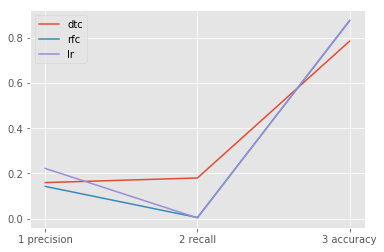

In [124]:
# Визуалищировать эти метрики всех моделей на одном графике (чтоб визуально посмотреть)

## Your Code Here
import matplotlib.pyplot as plt

x =  ['1 precision','2 recall','3 accuracy']
y1 = [precision_score(y_test, predict_dtc), recall_score(y_test, predict_dtc), accuracy_score(y_test, predict_dtc)]
y2 = [precision_score(y_test, predict_rfc), recall_score(y_test, predict_rfc), accuracy_score(y_test, predict_rfc)]
y3 = [precision_score(y_test, predict_lr), recall_score(y_test, predict_lr), accuracy_score(y_test, predict_lr)]

plt.plot (x, y1, label='dtc')
plt.plot (x, y2, label='rfc')
plt.plot (x, y3, label='lr')
plt.legend()
plt.show()

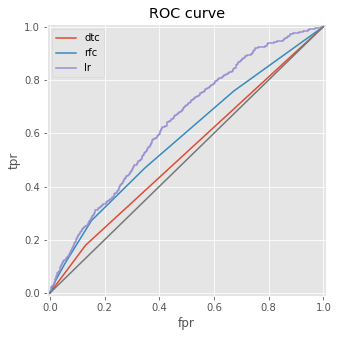

0.5245367501100302
0.5816842265994808
0.6390414342557913


In [125]:
# Потроить roc-кривые всех моделей на одном графике
# Вывести roc_auc каждой моделе

## Your Code Here
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
fpr1, tpr1, thresholds1 = roc_curve(y_test, dtc.predict_proba(X_test)[:,1])
fpr2, tpr2, thresholds2 = roc_curve(y_test, rfc.predict_proba(X_test)[:,1])
fpr3, tpr3, thresholds3 = roc_curve(y_test, lr.predict_proba(X_test)[:,1])
plt.figure(figsize=(5, 5))
plt.plot(fpr1, tpr1, label='dtc')
plt.plot(fpr2, tpr2, label='rfc')
plt.plot(fpr3, tpr3, label='lr')
plt.plot([0, 1], [0, 1])
plt.legend()
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

plt.show()

print(roc_auc_score(y_test, dtc.predict_proba(X_test)[:,1]))
print(roc_auc_score(y_test, rfc.predict_proba(X_test)[:,1]))
print(roc_auc_score(y_test, lr.predict_proba(X_test)[:,1]))

In [126]:
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import StratifiedKFold
# Сделать k-fold (10 фолдов) кросс-валидацию каждой модели
# И посчитать средний roc_auc
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)

#print(cv)

## Your Code Here
def cvs_averrage (cvs):
    i=len(cvs)
    s=0
    for cvs_i in cvs:
       s += cvs_i
    return(s/i)          

rfc = RandomForestClassifier()
dtc_cvs = cross_val_score(dtc, X, y, scoring='roc_auc',cv=10)
#print("dtc", dtc_cvs)
print("dtc average", cvs_averrage(dtc_cvs))
rfc_cvs = cross_val_score(rfc, X, y, scoring='roc_auc',cv=10)
#print("rfc", rfc_cvs)
print("rfc average", cvs_averrage(rfc_cvs))
lr_cvs = cross_val_score(lr,  X, y, scoring='roc_auc',cv=10)
#print("lr ", lr_cvs)
print("lr average ", cvs_averrage(lr_cvs))

dtc average 0.5235840718477589
rfc average 0.5757055544010367
lr average  0.6360408429282483


In [127]:
# Взять лучшую модель и сделать predict (с вероятностями (!!!)) для test выборки


## Your Code Here

df_test_preproc_d=df_test_preproc.drop(['TARGET'], axis=1)
lr = LogisticRegression()
lr.fit(X, y)
#predict_lr = lr.predict(X_test)
#print(accuracy_score(y_test,predict_lr))
predict_lr = lr.predict_proba(df_test_preproc_d)

In [128]:
# Померить roc_auc на тесте
print(roc_auc_score(df_test_preproc['TARGET'], lr.predict_proba(df_test_preproc_d)[:,1]))

0.6272702561875814


In [129]:
predict

array([[0.84803129, 0.15196871],
       [0.92583778, 0.07416222],
       [0.82243641, 0.17756359],
       ...,
       [0.83742642, 0.16257358],
       [0.93921837, 0.06078163],
       [0.83703552, 0.16296448]])